**Health Insurance Cross-Sell Prediction**

This project aims to predict health insurance customers, using their profiles, who may be interested in vehicle insurance provided by the same company, known as Health Insurance Cross-Selling.

**Import Data**

We begin by importing the data into python from a CSV file. The file with the training data has been imported as train and we have a holdout data, test, for testing the accuracy of the model.


In [60]:
import numpy as np
import pandas as pd
# Reading the csv file

df = pd.read_csv("train.csv")


**Explore the data characteristics**
The next step is to investiagete the characteristics of the training and testing data.

In [61]:
# See first 5 rows of the training data
df.head()



,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0



**Variable Descriptions**

*id*:	Unique ID for the customer

*Gender*:	Gender of the customer

*Age*:	Age of the customer

*Driving_License*:	0:- Customer does not have DL, 1:- Customer already has DL

*Region_Code*: Unique code for the region of the customer

*Previously_Insured*: 1:- Customer already has Vehicle Insurance, 0:- Customer doesn't have Vehicle Insurance

*Vehicle_Age*:	Age of the Vehicle

*Vehicle_Damage*	Yes:- Customer got his/her vehicle damaged in the past. No:- Customer didn't get his/her vehicle damaged in the past.

*Annual_Premium*: The amount customer needs to pay as premium in the year. **Note**: Not US$

*Policy_Sales_Channel*:	Anonymized Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.

*Vintage*:	Number of Days, Customer has been associated with the company

*Response*:	1:- Customer is interested, 0:- Customer is not interested



In [62]:
print("The shape of the data: " + str(df.shape))

print("The data information: ")

df.info()


The shape of the data: (381109, 12)
The data information: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


### Data Wrangling

*Region_Code*, and *Policy_Sales_Channel* to be changed to object type

*Vehicle_Damage*, *Vehicle_Age*, *Gender* to be hot encoded

In [63]:
# Create a dictionary for columns requiring change of data type
data_types_dict = {'Policy_Sales_Channel': str, 'Region_Code':str,'Driving_License': str, 'Previously_Insured':str, 'Response':str}

# Pass the dictionary to .astype() to change the data type
df_cat = df.astype(data_types_dict)
print(df_cat.info())
# Selecting columns of object dtype
df_cat = df_cat.select_dtypes(include='object')

print(df_cat.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  object
 4   Region_Code           381109 non-null  object
 5   Previously_Insured    381109 non-null  object
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  object
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  object
dtypes: int64(4), object(8)
memory usage: 34.9+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 8 columns):
 #   Colu

In [64]:
# Hot encoding the object columns
print(df.info())
# Create a dictionary for columns requiring change of data type
data_types_dict = {'Policy_Sales_Channel': str, 'Region_Code':str}

# Pass the dictionary to .astype() to change the data type
df = df.astype(data_types_dict)

df = pd.get_dummies(df, prefix=['Gender', 'Region_Code', 'Vehicle_Age', 'Vehicle_Damage', 'Policy_Sales_Channel'], drop_first=True)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB
None


,id,Age,Driving_License,Previously_Insured,Annual_Premium,Vintage,Response,Gender_Male,Region_Code_1,Region_Code_10,...,Policy_Sales_Channel_90,Policy_Sales_Channel_91,Policy_Sales_Channel_92,Policy_Sales_Channel_93,Policy_Sales_Channel_94,Policy_Sales_Channel_95,Policy_Sales_Channel_96,Policy_Sales_Channel_97,Policy_Sales_Channel_98,Policy_Sales_Channel_99
0,1,44,1,0,40454,217,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,76,1,0,33536,183,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,47,1,0,38294,27,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,21,1,1,28619,203,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,29,1,1,27496,39,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Summarize

The data is perfect and does not require any wrangling. The next step is to summarize the data.

In [65]:
print(df_cat.describe())
df[['Age', 'Vintage','Annual_Premium']].describe()

        Gender Driving_License Region_Code Previously_Insured Vehicle_Age  \
count   381109          381109      381109             381109      381109   
unique       2               2          53                  2           3   
top       Male               1          28                  0    1-2 Year   
freq    206089          380297      106415             206481      200316   

       Vehicle_Damage Policy_Sales_Channel Response  
count          381109               381109   381109  
unique              2                  155        2  
top               Yes                  152        0  
freq           192413               134784   334399  


,Age,Vintage,Annual_Premium
count,381109.000000,381109.000000,381109.000000
mean,38.822584,154.347397,30564.389581
std,15.511611,83.671304,17213.155057
min,20.000000,10.000000,2630.000000
25%,25.000000,82.000000,24405.000000
50%,36.000000,154.000000,31669.000000
75%,49.000000,227.000000,39400.000000
max,85.000000,299.000000,540165.000000


The data are unbalanced with a high number of customers, 334399/381109, that were not interested in vehicle insurance. Balancing out the response may lead to better predictions.

### Data Visualization

In [67]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set(style="whitegrid")


<AxesSubplot:xlabel='Response', ylabel='count'>

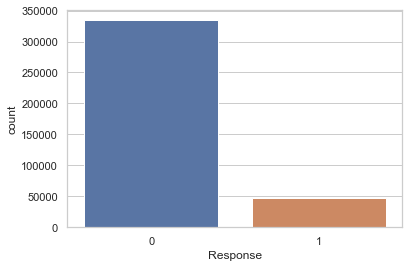

In [68]:
sns.countplot(x="Response", data=df)

<AxesSubplot:xlabel='Vehicle_Age', ylabel='count'>

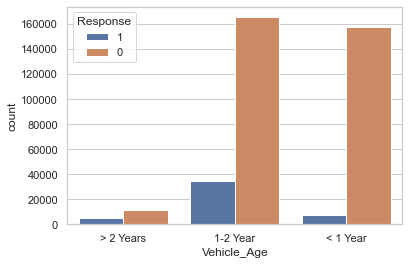

In [69]:
sns.countplot(x="Vehicle_Age", hue="Response", data=df_cat)

<AxesSubplot:xlabel='Age', ylabel='Count'>

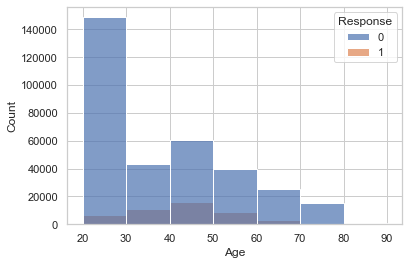

In [70]:
sns.histplot(x="Age", hue="Response", alpha=.7, binwidth = 10, data = df)

<AxesSubplot:xlabel='Annual_Premium', ylabel='Count'>

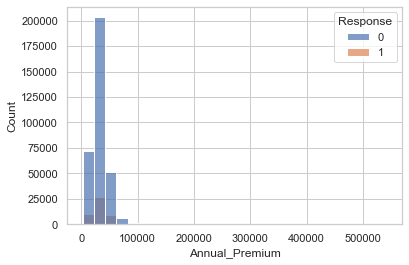

In [71]:
sns.histplot(x="Annual_Premium", hue="Response", alpha=.7, binwidth = 20000, data = df)

<AxesSubplot:xlabel='Vintage', ylabel='Count'>

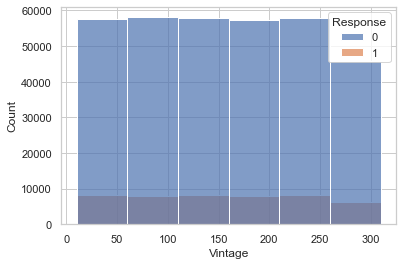

In [72]:
sns.histplot(x="Vintage", hue="Response", alpha=.7, binwidth = 50, data = df)

### Train and Test data Split

In [73]:
from sklearn.model_selection import train_test_split
df_x = df.drop('Response', axis = 1)
df_y = pd.DataFrame(df.Response)


In [74]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.33, random_state=42)



### Fitting and Training Logistic Regression Model

In [75]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

In [76]:
logmodel.fit(x_train,y_train)

C:\Users\tuo02129\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [77]:
predictions = logmodel.predict(x_test)

### Assessing Prediction Accuracy with AUC_ROC

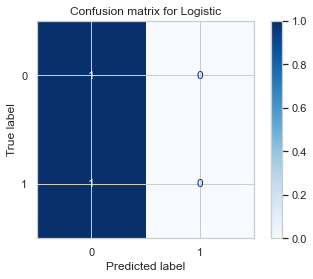

Model Accuracy: 0.8766359747467519
Model AUC ROC: 0.5


In [78]:
from sklearn.metrics import plot_confusion_matrix, accuracy_score, roc_auc_score

# Evaluate by means of a confusion matrix
matrix = plot_confusion_matrix(logmodel, x_test, y_test,
                               cmap=plt.cm.Blues, 
                               normalize='true')
plt.title('Confusion matrix for Logistic')
plt.show(matrix)
plt.show()

accuracy = accuracy_score(y_test, predictions)

print(f'Model Accuracy: {accuracy}')

roc = roc_auc_score(y_test, predictions)

print(f'Model AUC ROC: {roc}')



### Plot the ROC CURVE

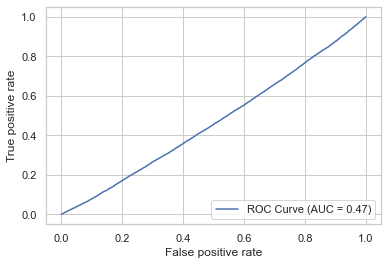

In [79]:
from sklearn.metrics import roc_curve, auc

probs = logmodel.predict_proba(x_test)
fpr1, tpr1, thresholds = roc_curve(y_test, probs[:, 1], pos_label=1)
roc_auc1 = auc(fpr1, tpr1)

plt.plot(fpr1, tpr1, label='ROC Curve (AUC = %0.2f)' % (roc_auc1))
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")
plt.show()